# Assignment 2: ANN Parameter Tuning

# UCI's breast cancer dataset (<a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29" target="_blank">Link</a>)


## 0. Data Engineering (Data Preparation)

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing the dataset

In [2]:
df = pd.read_csv('Data.csv')
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [3]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
x

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [5]:
y # Class: (2 for benign, 4 for malignant)

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

#### Dealing with missing values

In [6]:
df.isnull().sum().sum()

0

#### Label Encoding the target variable "y"

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y) #So, "2" -> "0" And "4" -> "1"

In [8]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

#### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [10]:
print(df.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(683, 11)
(512, 9)
(171, 9)
(512,)
(171,)


#### Feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
x_train

array([[ 0.91903747,  0.9407658 ,  2.30881719, ...,  2.22576767,
         2.27129602,  0.24623928],
       [ 1.27578287, -0.04290763,  1.63138773, ...,  1.82407819,
         1.94996317,  3.74830911],
       [ 1.27578287,  2.25233038,  2.30881719, ...,  2.62745714,
         2.27129602, -0.33743902],
       ...,
       [-1.22143494, -0.69868992, -0.73961536, ..., -0.98774815,
        -0.62069958, -0.33743902],
       [-0.50794414, -0.69868992, -0.73961536, ..., -0.58605867,
        -0.62069958, -0.33743902],
       [ 1.98927367,  1.92443923,  1.29267301, ...,  1.42238871,
         1.30729749, -0.33743902]])

## 1. Neural Network Model (ANN)

### (i) 3 layers:

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_curve, auc, roc_auc_score
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [14]:
metrics_table_3 = []
result_3 = []

In [15]:
neuron = [10, 30, 50]
act_fun = ['relu', 'tanh', 'sigmoid']
opt = ['adam', 'SGD', 'RMSprop']
epoch = [10, 20, 30] 

for units in neuron:
    for activation in act_fun:
        for optimizer in opt:
            for epochs in epoch:
                
                ann = Sequential()
                ann.add(Dense(units = units, activation = activation)) #hidden layer 1
                ann.add(Dense(units = units, activation = activation)) #hidden layer 2
                ann.add(Dense(units = units, activation = activation)) #hidden layer 3
                ann.add(Dense(units = 1, activation = 'sigmoid'))

                ann.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

                early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

                ann.fit(x_train, y_train, epochs = epochs, validation_data = (x_test, y_test), callbacks = [early_stop])
                
                metrics_general = pd.DataFrame(ann.history.history)
                metrics_table_3.append(metrics_general)

                y_pred = ann.predict(x_test)
                y_pred = (y_pred > 0.5)
                #print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis = 1))

                #Confusion matrix and accuracy score:
                cm = confusion_matrix(y_test, y_pred)
                ac = accuracy_score(y_test, y_pred)
                
                #Precision:
                ps = precision_score(y_test, y_pred, average = 'macro')
                
                #AUC metric: (also the ROC curve)
                roc_auc_metric = roc_auc_score(y_test, y_pred)

                dic = dict({'neurons':units, 'activation_function':activation, 'optimizer':optimizer, 'epochs':epochs, 'confusion_matrix':cm, 'accuracy':ac, 'precision':ps, 'ROC_AUC_curve':roc_auc_metric})
                result_3.append(dic)

Epoch 1/10
16/16 [==============================] - 0s 15ms/step - loss: 0.6622 - accuracy: 0.6230 - val_loss: 0.6326 - val_accuracy: 0.7778
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5962 - accuracy: 0.8438 - val_loss: 0.5705 - val_accuracy: 0.8129
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5306 - accuracy: 0.8691 - val_loss: 0.5090 - val_accuracy: 0.8480
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4618 - accuracy: 0.8809 - val_loss: 0.4425 - val_accuracy: 0.8538
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.9102 - val_loss: 0.3768 - val_accuracy: 0.8480
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.9297 - val_loss: 0.3165 - val_accuracy: 0.9181
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.2626 - accuracy: 0.9531 - val_loss: 0.2649 - val_accuracy: 0.9123
Epoch 8/10
16/16 [=

16/16 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.6992 - val_loss: 0.6581 - val_accuracy: 0.7544
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.7559 - val_loss: 0.6401 - val_accuracy: 0.7544
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6316 - accuracy: 0.7598 - val_loss: 0.6226 - val_accuracy: 0.7602
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6136 - accuracy: 0.7656 - val_loss: 0.6039 - val_accuracy: 0.7778
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 0.5942 - accuracy: 0.7812 - val_loss: 0.5841 - val_accuracy: 0.8012
Epoch 8/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5731 - accuracy: 0.7891 - val_loss: 0.5621 - val_accuracy: 0.8012
Epoch 9/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5499 - accuracy: 0.8086 - val_loss: 0.5374 - val_accuracy: 0.8129
Epoch 10/10
16/16 [============

16/16 [==============================] - 0s 12ms/step - loss: 0.6073 - accuracy: 0.8496 - val_loss: 0.5646 - val_accuracy: 0.8830
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5403 - accuracy: 0.9180 - val_loss: 0.5049 - val_accuracy: 0.9064
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4758 - accuracy: 0.9395 - val_loss: 0.4428 - val_accuracy: 0.9181
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.4122 - accuracy: 0.9453 - val_loss: 0.3841 - val_accuracy: 0.9357
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.3521 - accuracy: 0.9531 - val_loss: 0.3299 - val_accuracy: 0.9357
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 0.2976 - accuracy: 0.9629 - val_loss: 0.2823 - val_accuracy: 0.9474
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.2490 - accuracy: 0.9629 - val_loss: 0.2402 - val_accuracy: 0.9532
Epoch 8/10
16/16 [============

16/16 [==============================] - 0s 4ms/step - loss: 0.4488 - accuracy: 0.9531 - val_loss: 0.3905 - val_accuracy: 0.9298
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.3271 - accuracy: 0.9648 - val_loss: 0.2989 - val_accuracy: 0.9474
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.2478 - accuracy: 0.9668 - val_loss: 0.2415 - val_accuracy: 0.9474
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1975 - accuracy: 0.9688 - val_loss: 0.2059 - val_accuracy: 0.9474
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1658 - accuracy: 0.9746 - val_loss: 0.1828 - val_accuracy: 0.9474
Epoch 8/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1449 - accuracy: 0.9746 - val_loss: 0.1677 - val_accuracy: 0.9474
Epoch 9/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1306 - accuracy: 0.9746 - val_loss: 0.1570 - val_accuracy: 0.9474
Epoch 10/10
16/16 [============

16/16 [==============================] - 0s 4ms/step - loss: 0.0752 - accuracy: 0.9805 - val_loss: 0.1318 - val_accuracy: 0.9591
Epoch 30/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0747 - accuracy: 0.9785 - val_loss: 0.1309 - val_accuracy: 0.9591
Epoch 1/10
16/16 [==============================] - 0s 13ms/step - loss: 0.5410 - accuracy: 0.8906 - val_loss: 0.5127 - val_accuracy: 0.8830
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4631 - accuracy: 0.9062 - val_loss: 0.4521 - val_accuracy: 0.8830
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4048 - accuracy: 0.9141 - val_loss: 0.4059 - val_accuracy: 0.8772
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.3593 - accuracy: 0.9258 - val_loss: 0.3695 - val_accuracy: 0.8947
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.3225 - accuracy: 0.9316 - val_loss: 0.3401 - val_accuracy: 0.9006
Epoch 6/10
16/16 [===========

16/16 [==============================] - 0s 5ms/step - loss: 0.1048 - accuracy: 0.9746 - val_loss: 0.1677 - val_accuracy: 0.9474
Epoch 28/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1032 - accuracy: 0.9746 - val_loss: 0.1665 - val_accuracy: 0.9474
Epoch 29/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1018 - accuracy: 0.9766 - val_loss: 0.1654 - val_accuracy: 0.9474
Epoch 30/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1005 - accuracy: 0.9766 - val_loss: 0.1644 - val_accuracy: 0.9474
Epoch 1/10
16/16 [==============================] - 0s 11ms/step - loss: 0.3670 - accuracy: 0.9590 - val_loss: 0.2947 - val_accuracy: 0.9591
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.2304 - accuracy: 0.9688 - val_loss: 0.2212 - val_accuracy: 0.9532
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1697 - accuracy: 0.9746 - val_loss: 0.1820 - val_accuracy: 0.9532
Epoch 4/10
16/16 [=========

16/16 [==============================] - 0s 5ms/step - loss: 0.0784 - accuracy: 0.9785 - val_loss: 0.1508 - val_accuracy: 0.9474
Epoch 26/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0781 - accuracy: 0.9785 - val_loss: 0.1493 - val_accuracy: 0.9474
Epoch 27/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9824 - val_loss: 0.1475 - val_accuracy: 0.9474
Epoch 28/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.9805 - val_loss: 0.1463 - val_accuracy: 0.9474
Epoch 29/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0767 - accuracy: 0.9805 - val_loss: 0.1452 - val_accuracy: 0.9474
Epoch 30/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0760 - accuracy: 0.9805 - val_loss: 0.1445 - val_accuracy: 0.9474
Epoch 1/10
16/16 [==============================] - 0s 14ms/step - loss: 0.6852 - accuracy: 0.6582 - val_loss: 0.7055 - val_accuracy: 0.6257
Epoch 2/10
16/16 [=======

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 12ms/step - loss: 0.6453 - accuracy: 0.6582 - val_loss: 0.6693 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6383 - accuracy: 0.6582 - val_loss: 0.6599 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6337 - accuracy: 0.6582 - val_loss: 0.6528 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6280 - accuracy: 0.6582 - val_loss: 0.6478 - val_accuracy: 0.6257
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6218 - accuracy: 0.6582 - val_loss: 0.6405 - val_accuracy: 0.6257
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6143 - accuracy: 0.6582 - val_loss: 0.6310 - val_accuracy: 0.6257
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6046 - accuracy: 0.6582 - val_loss: 0.6202 - val_accuracy: 0.6257
Epoch 8/20
16/16 [============

16/16 [==============================] - 0s 4ms/step - loss: 0.6444 - accuracy: 0.6582 - val_loss: 0.6601 - val_accuracy: 0.6257
Epoch 10/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.6582 - val_loss: 0.6598 - val_accuracy: 0.6257


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8043 - accuracy: 0.3418 - val_loss: 0.7658 - val_accuracy: 0.3743
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.7609 - accuracy: 0.3418 - val_loss: 0.7342 - val_accuracy: 0.3743
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.7292 - accuracy: 0.3418 - val_loss: 0.7119 - val_accuracy: 0.3743
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.7066 - accuracy: 0.3418 - val_loss: 0.6962 - val_accuracy: 0.0936
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.6035 - val_loss: 0.6854 - val_accuracy: 0.6257
Epoch 6/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.6582 - val_loss: 0.6778 - val_accuracy: 0.6257
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6687 - accuracy: 0.6582 - val_loss: 0.6727 - val_accuracy: 0.6257
Epoch 8/20
16/16 [=

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 11ms/step - loss: 0.6444 - accuracy: 0.6582 - val_loss: 0.6624 - val_accuracy: 0.6257
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6440 - accuracy: 0.6582 - val_loss: 0.6625 - val_accuracy: 0.6257
Epoch 1/10


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 11ms/step - loss: 0.7505 - accuracy: 0.3418 - val_loss: 0.7214 - val_accuracy: 0.3743
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.7136 - accuracy: 0.3418 - val_loss: 0.6971 - val_accuracy: 0.3743
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5801 - val_loss: 0.6780 - val_accuracy: 0.6257
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.6582 - val_loss: 0.6644 - val_accuracy: 0.6257
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.6582 - val_loss: 0.6549 - val_accuracy: 0.6257
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.6582 - val_loss: 0.6484 - val_accuracy: 0.6257
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6310 - accuracy: 0.6582 - val_loss: 0.6430 - val_accuracy: 0.6257
Epoch 8/10
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



16/16 [==============================] - 0s 16ms/step - loss: 0.6449 - accuracy: 0.6582 - val_loss: 0.6552 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6371 - accuracy: 0.6582 - val_loss: 0.6522 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6327 - accuracy: 0.6582 - val_loss: 0.6494 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.6582 - val_loss: 0.6458 - val_accuracy: 0.6257
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6235 - accuracy: 0.6582 - val_loss: 0.6411 - val_accuracy: 0.6257
Epoch 6/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6179 - accuracy: 0.6582 - val_loss: 0.6358 - val_accuracy: 0.6257
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6113 - accuracy: 0.6582 - val_loss: 0.6285 - val_accuracy: 0.6257
Epoch 8/20
16/16 [===========

16/16 [==============================] - 0s 4ms/step - loss: 0.2305 - accuracy: 0.9727 - val_loss: 0.2047 - val_accuracy: 0.9474
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.1320 - accuracy: 0.9727 - val_loss: 0.1500 - val_accuracy: 0.9474
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0932 - accuracy: 0.9746 - val_loss: 0.1327 - val_accuracy: 0.9474
Epoch 6/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0800 - accuracy: 0.9746 - val_loss: 0.1267 - val_accuracy: 0.9474
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0750 - accuracy: 0.9746 - val_loss: 0.1236 - val_accuracy: 0.9532
Epoch 8/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0720 - accuracy: 0.9746 - val_loss: 0.1207 - val_accuracy: 0.9532
Epoch 9/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9746 - val_loss: 0.1195 - val_accuracy: 0.9532
Epoch 10/20
16/16 [============

16/16 [==============================] - 0s 5ms/step - loss: 0.5245 - accuracy: 0.9492 - val_loss: 0.4923 - val_accuracy: 0.9181
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 0.4526 - accuracy: 0.9531 - val_loss: 0.4317 - val_accuracy: 0.9240
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.9531 - val_loss: 0.3816 - val_accuracy: 0.9240
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.3443 - accuracy: 0.9570 - val_loss: 0.3384 - val_accuracy: 0.9240
Epoch 6/30
16/16 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.9570 - val_loss: 0.3010 - val_accuracy: 0.9181
Epoch 7/30
16/16 [==============================] - 0s 6ms/step - loss: 0.2642 - accuracy: 0.9570 - val_loss: 0.2692 - val_accuracy: 0.9240
Epoch 8/30
16/16 [==============================] - 0s 5ms/step - loss: 0.2330 - accuracy: 0.9609 - val_loss: 0.2428 - val_accuracy: 0.9240
Epoch 9/30
16/16 [=============

16/16 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9766 - val_loss: 0.0981 - val_accuracy: 0.9532
Epoch 9/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0637 - accuracy: 0.9766 - val_loss: 0.0956 - val_accuracy: 0.9532
Epoch 10/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0628 - accuracy: 0.9766 - val_loss: 0.0936 - val_accuracy: 0.9532
Epoch 11/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0617 - accuracy: 0.9785 - val_loss: 0.0943 - val_accuracy: 0.9532
Epoch 1/10
16/16 [==============================] - 1s 40ms/step - loss: 0.3619 - accuracy: 0.9492 - val_loss: 0.2283 - val_accuracy: 0.9357
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.1409 - accuracy: 0.9746 - val_loss: 0.1512 - val_accuracy: 0.9415
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0932 - accuracy: 0.9746 - val_loss: 0.1370 - val_accuracy: 0.9474
Epoch 4/10
16/16 [==========

16/16 [==============================] - 0s 4ms/step - loss: 0.1028 - accuracy: 0.9766 - val_loss: 0.1289 - val_accuracy: 0.9532
Epoch 12/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0989 - accuracy: 0.9766 - val_loss: 0.1264 - val_accuracy: 0.9532
Epoch 13/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0958 - accuracy: 0.9766 - val_loss: 0.1244 - val_accuracy: 0.9532
Epoch 14/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0932 - accuracy: 0.9766 - val_loss: 0.1229 - val_accuracy: 0.9532
Epoch 15/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0912 - accuracy: 0.9766 - val_loss: 0.1216 - val_accuracy: 0.9532
Epoch 16/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0894 - accuracy: 0.9785 - val_loss: 0.1206 - val_accuracy: 0.9532
Epoch 17/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0880 - accuracy: 0.9766 - val_loss: 0.1198 - val_accuracy: 0.9532
Epoch 18/20
16/16 [======

16/16 [==============================] - 0s 4ms/step - loss: 0.1385 - accuracy: 0.9688 - val_loss: 0.1209 - val_accuracy: 0.9591
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0976 - accuracy: 0.9746 - val_loss: 0.1036 - val_accuracy: 0.9591
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0859 - accuracy: 0.9746 - val_loss: 0.0995 - val_accuracy: 0.9591
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0824 - accuracy: 0.9785 - val_loss: 0.0994 - val_accuracy: 0.9649
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.9785 - val_loss: 0.1006 - val_accuracy: 0.9649
Epoch 1/10
16/16 [==============================] - 0s 11ms/step - loss: 0.7124 - accuracy: 0.6582 - val_loss: 0.6972 - val_accuracy: 0.6257
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6407 - accuracy: 0.6582 - val_loss: 0.6464 - val_accuracy: 0.6257
Epoch 3/10
16/16 [============

16/16 [==============================] - 0s 4ms/step - loss: 0.0873 - accuracy: 0.9766 - val_loss: 0.1365 - val_accuracy: 0.9474
Epoch 25/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0861 - accuracy: 0.9766 - val_loss: 0.1345 - val_accuracy: 0.9474
Epoch 26/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 0.9766 - val_loss: 0.1342 - val_accuracy: 0.9474
Epoch 27/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0845 - accuracy: 0.9766 - val_loss: 0.1337 - val_accuracy: 0.9474
Epoch 28/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.9785 - val_loss: 0.1328 - val_accuracy: 0.9474
Epoch 29/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0832 - accuracy: 0.9766 - val_loss: 0.1308 - val_accuracy: 0.9474
Epoch 30/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0825 - accuracy: 0.9785 - val_loss: 0.1314 - val_accuracy: 0.9474
Epoch 1/10
16/16 [=======

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 17ms/step - loss: 0.6678 - accuracy: 0.6582 - val_loss: 0.6674 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6544 - accuracy: 0.6582 - val_loss: 0.6623 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.6582 - val_loss: 0.6604 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6447 - accuracy: 0.6582 - val_loss: 0.6599 - val_accuracy: 0.6257
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.6582 - val_loss: 0.6599 - val_accuracy: 0.6257


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/30
16/16 [==============================] - 0s 12ms/step - loss: 0.6766 - accuracy: 0.6582 - val_loss: 0.6738 - val_accuracy: 0.6257
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.6582 - val_loss: 0.6678 - val_accuracy: 0.6257
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.6582 - val_loss: 0.6656 - val_accuracy: 0.6257
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6582 - val_loss: 0.6651 - val_accuracy: 0.6257
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6582 - val_loss: 0.6652 - val_accuracy: 0.6257
Epoch 1/10


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 22ms/step - loss: 0.6987 - accuracy: 0.6582 - val_loss: 0.6843 - val_accuracy: 0.6257
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6410 - accuracy: 0.6582 - val_loss: 0.6574 - val_accuracy: 0.6257
Epoch 3/10
16/16 [==============================] - 0s 6ms/step - loss: 0.6235 - accuracy: 0.6582 - val_loss: 0.6365 - val_accuracy: 0.6257
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6062 - accuracy: 0.6582 - val_loss: 0.6201 - val_accuracy: 0.6257
Epoch 5/10
16/16 [==============================] - 0s 7ms/step - loss: 0.5823 - accuracy: 0.6582 - val_loss: 0.5937 - val_accuracy: 0.6257
Epoch 6/10
16/16 [==============================] - 0s 7ms/step - loss: 0.5479 - accuracy: 0.6582 - val_loss: 0.5459 - val_accuracy: 0.6257
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 0.5004 - accuracy: 0.6738 - val_loss: 0.4955 - val_accuracy: 0.6491
Epoch 8/10
16/16 [============

16/16 [==============================] - 0s 4ms/step - loss: 0.0620 - accuracy: 0.9785 - val_loss: 0.0975 - val_accuracy: 0.9532
Epoch 10/10
16/16 [==============================] - 0s 5ms/step - loss: 0.0597 - accuracy: 0.9785 - val_loss: 0.0946 - val_accuracy: 0.9532
Epoch 1/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5310 - accuracy: 0.8340 - val_loss: 0.3841 - val_accuracy: 0.9591
Epoch 2/20
16/16 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 0.9766 - val_loss: 0.2112 - val_accuracy: 0.9532
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: 0.1400 - accuracy: 0.9766 - val_loss: 0.1223 - val_accuracy: 0.9474
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0832 - accuracy: 0.9785 - val_loss: 0.1092 - val_accuracy: 0.9415
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0718 - accuracy: 0.9785 - val_loss: 0.1066 - val_accuracy: 0.9415
Epoch 6/20
16/16 [===========

16/16 [==============================] - 0s 4ms/step - loss: 0.5722 - accuracy: 0.9082 - val_loss: 0.5582 - val_accuracy: 0.8655
Epoch 4/30
16/16 [==============================] - 0s 6ms/step - loss: 0.5098 - accuracy: 0.9336 - val_loss: 0.5056 - val_accuracy: 0.8889
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 0.4576 - accuracy: 0.9512 - val_loss: 0.4600 - val_accuracy: 0.8947
Epoch 6/30
16/16 [==============================] - 0s 5ms/step - loss: 0.4110 - accuracy: 0.9531 - val_loss: 0.4182 - val_accuracy: 0.9006
Epoch 7/30
16/16 [==============================] - 0s 5ms/step - loss: 0.3683 - accuracy: 0.9590 - val_loss: 0.3803 - val_accuracy: 0.9123
Epoch 8/30
16/16 [==============================] - 0s 5ms/step - loss: 0.3291 - accuracy: 0.9609 - val_loss: 0.3455 - val_accuracy: 0.9123
Epoch 9/30
16/16 [==============================] - 0s 5ms/step - loss: 0.2932 - accuracy: 0.9629 - val_loss: 0.3141 - val_accuracy: 0.9181
Epoch 10/30
16/16 [============

16/16 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9824 - val_loss: 0.0804 - val_accuracy: 0.9591
Epoch 14/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9824 - val_loss: 0.0815 - val_accuracy: 0.9591
Epoch 1/10
16/16 [==============================] - 0s 21ms/step - loss: 0.2204 - accuracy: 0.9707 - val_loss: 0.1488 - val_accuracy: 0.9415
Epoch 2/10
16/16 [==============================] - 0s 6ms/step - loss: 0.0837 - accuracy: 0.9805 - val_loss: 0.1352 - val_accuracy: 0.9474
Epoch 3/10
16/16 [==============================] - 0s 9ms/step - loss: 0.0776 - accuracy: 0.9785 - val_loss: 0.1247 - val_accuracy: 0.9532
Epoch 4/10
16/16 [==============================] - 0s 9ms/step - loss: 0.0755 - accuracy: 0.9785 - val_loss: 0.1176 - val_accuracy: 0.9474
Epoch 5/10
16/16 [==============================] - 0s 16ms/step - loss: 0.0746 - accuracy: 0.9785 - val_loss: 0.1102 - val_accuracy: 0.9532
Epoch 6/10
16/16 [==========

16/16 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9785 - val_loss: 0.1303 - val_accuracy: 0.9415
Epoch 12/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.9785 - val_loss: 0.1288 - val_accuracy: 0.9415
Epoch 13/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9785 - val_loss: 0.1276 - val_accuracy: 0.9415
Epoch 14/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9785 - val_loss: 0.1266 - val_accuracy: 0.9415
Epoch 15/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9785 - val_loss: 0.1258 - val_accuracy: 0.9415
Epoch 16/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9785 - val_loss: 0.1252 - val_accuracy: 0.9415
Epoch 17/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0813 - accuracy: 0.9785 - val_loss: 0.1246 - val_accuracy: 0.9415
Epoch 18/30
16/16 [======

16/16 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.9785 - val_loss: 0.1326 - val_accuracy: 0.9474
Epoch 17/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9785 - val_loss: 0.1309 - val_accuracy: 0.9474
Epoch 18/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9785 - val_loss: 0.1300 - val_accuracy: 0.9474
Epoch 19/20
16/16 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9785 - val_loss: 0.1308 - val_accuracy: 0.9474
Epoch 1/30
16/16 [==============================] - 0s 11ms/step - loss: 0.6404 - accuracy: 0.6582 - val_loss: 0.6513 - val_accuracy: 0.6257
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.6582 - val_loss: 0.6299 - val_accuracy: 0.6257
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.6582 - val_loss: 0.5896 - val_accuracy: 0.6257
Epoch 4/30
16/16 [=========

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 11ms/step - loss: 0.6624 - accuracy: 0.6582 - val_loss: 0.6645 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6582 - val_loss: 0.6618 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.6582 - val_loss: 0.6616 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.6582 - val_loss: 0.6619 - val_accuracy: 0.6257
Epoch 1/30


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 13ms/step - loss: 0.9293 - accuracy: 0.3418 - val_loss: 0.7626 - val_accuracy: 0.3743
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7185 - accuracy: 0.4102 - val_loss: 0.6804 - val_accuracy: 0.6257
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6582 - val_loss: 0.6637 - val_accuracy: 0.6257
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.6582 - val_loss: 0.6608 - val_accuracy: 0.6257
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6582 - val_loss: 0.6609 - val_accuracy: 0.6257
Epoch 1/10


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 11ms/step - loss: 0.7101 - accuracy: 0.5020 - val_loss: 0.6435 - val_accuracy: 0.6257
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6136 - accuracy: 0.6582 - val_loss: 0.6132 - val_accuracy: 0.6257
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.6582 - val_loss: 0.5632 - val_accuracy: 0.6257
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.6895 - val_loss: 0.4851 - val_accuracy: 0.7836
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8477 - val_loss: 0.3988 - val_accuracy: 0.8830
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.9219 - val_loss: 0.3065 - val_accuracy: 0.9064
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9648 - val_loss: 0.2320 - val_accuracy: 0.9123
Epoch 8/10
16/16 [============

In [17]:
max_acu = 0 #maximum accuracy score
for i in range(0, len(result_3)):
    if result_3[i]['accuracy'] > max_acu:
        max_acu = result_3[i]['accuracy']
        index_max_acu = i
    else:
        continue

In [18]:
print(max_acu)
print(index_max_acu)

0.9649122807017544
8


In [19]:
result_3[8]

{'neurons': 10,
 'activation_function': 'relu',
 'optimizer': 'RMSprop',
 'epochs': 30,
 'confusion_matrix': array([[103,   4],
        [  2,  62]], dtype=int64),
 'accuracy': 0.9649122807017544,
 'precision': 0.9601731601731602,
 'ROC_AUC_curve': 0.9656834112149533}

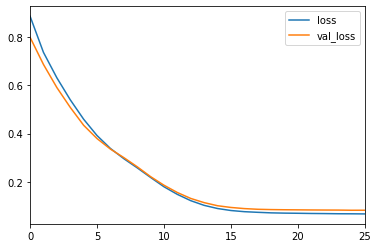

In [21]:
metrics_table_3[8][['loss', 'val_loss']].plot()

### (ii) 4 layers:

In [23]:
metrics_table_4 = []
result_4 = []

In [24]:
neuron = [10, 30, 50]
act_fun = ['relu', 'tanh', 'sigmoid']
opt = ['adam', 'SGD', 'RMSprop']
epoch = [10, 20, 30] 

for units in neuron:
    for activation in act_fun:
        for optimizer in opt:
            for epochs in epoch:
                
                ann = Sequential()
                ann.add(Dense(units = units, activation = activation)) #hidden layer 1
                ann.add(Dense(units = units, activation = activation)) #hidden layer 2
                ann.add(Dense(units = units, activation = activation)) #hidden layer 3
                ann.add(Dense(units = units, activation = activation)) #hidden layer 4
                ann.add(Dense(units = 1, activation = 'sigmoid'))

                ann.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

                early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

                ann.fit(x_train, y_train, epochs = epochs, validation_data = (x_test, y_test), callbacks = [early_stop])
                
                metrics_general = pd.DataFrame(ann.history.history)
                metrics_table_4.append(metrics_general)

                y_pred = ann.predict(x_test)
                y_pred = (y_pred > 0.5)
                #print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis = 1))

                #Confusion matrix and accuracy score:
                cm = confusion_matrix(y_test, y_pred)
                ac = accuracy_score(y_test, y_pred)
                
                #Precision:
                ps = precision_score(y_test, y_pred, average = 'macro')
                
                #AUC metric: (also the ROC curve)
                roc_auc_metric = roc_auc_score(y_test, y_pred)

                dic = dict({'neurons':units, 'activation_function':activation, 'optimizer':optimizer, 'epochs':epochs, 'confusion_matrix':cm, 'accuracy':ac, 'precision':ps, 'ROC_AUC_curve':roc_auc_metric})
                result_4.append(dic)

Epoch 1/10
16/16 [==============================] - 0s 16ms/step - loss: 0.7488 - accuracy: 0.0820 - val_loss: 0.7168 - val_accuracy: 0.1170
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4766 - val_loss: 0.6735 - val_accuracy: 0.7135
Epoch 3/10
16/16 [==============================] - 0s 6ms/step - loss: 0.6541 - accuracy: 0.7832 - val_loss: 0.6411 - val_accuracy: 0.7544
Epoch 4/10
16/16 [==============================] - 0s 8ms/step - loss: 0.6179 - accuracy: 0.8340 - val_loss: 0.6041 - val_accuracy: 0.7953
Epoch 5/10
16/16 [==============================] - 0s 7ms/step - loss: 0.5685 - accuracy: 0.8613 - val_loss: 0.5489 - val_accuracy: 0.8421
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 0.4938 - accuracy: 0.9023 - val_loss: 0.4648 - val_accuracy: 0.8772
Epoch 7/10
16/16 [==============================] - 0s 7ms/step - loss: 0.3906 - accuracy: 0.9316 - val_loss: 0.3608 - val_accuracy: 0.9123
Epoch 8/10
16/16 [=

16/16 [==============================] - 0s 5ms/step - loss: 0.0653 - accuracy: 0.9785 - val_loss: 0.0873 - val_accuracy: 0.9591
Epoch 28/30
16/16 [==============================] - 0s 7ms/step - loss: 0.0643 - accuracy: 0.9785 - val_loss: 0.0870 - val_accuracy: 0.9591
Epoch 29/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0636 - accuracy: 0.9785 - val_loss: 0.0866 - val_accuracy: 0.9591
Epoch 30/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0629 - accuracy: 0.9785 - val_loss: 0.0861 - val_accuracy: 0.9591
Epoch 1/10
16/16 [==============================] - 1s 48ms/step - loss: 0.6357 - accuracy: 0.6523 - val_loss: 0.6338 - val_accuracy: 0.7544
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.8301 - val_loss: 0.6128 - val_accuracy: 0.8480
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.8984 - val_loss: 0.5905 - val_accuracy: 0.9240
Epoch 4/10
16/16 [=========

16/16 [==============================] - 0s 3ms/step - loss: 0.2988 - accuracy: 0.9746 - val_loss: 0.3068 - val_accuracy: 0.9591
Epoch 26/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2909 - accuracy: 0.9746 - val_loss: 0.2995 - val_accuracy: 0.9591
Epoch 27/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2830 - accuracy: 0.9746 - val_loss: 0.2923 - val_accuracy: 0.9532
Epoch 28/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2754 - accuracy: 0.9746 - val_loss: 0.2852 - val_accuracy: 0.9532
Epoch 29/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.9727 - val_loss: 0.2783 - val_accuracy: 0.9532
Epoch 30/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2607 - accuracy: 0.9727 - val_loss: 0.2716 - val_accuracy: 0.9532
Epoch 1/10
16/16 [==============================] - 0s 12ms/step - loss: 0.6610 - accuracy: 0.7188 - val_loss: 0.6066 - val_accuracy: 0.7427
Epoch 2/10
16/16 [=======

16/16 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9785 - val_loss: 0.0936 - val_accuracy: 0.9591
Epoch 24/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9785 - val_loss: 0.0927 - val_accuracy: 0.9591
Epoch 25/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9805 - val_loss: 0.0922 - val_accuracy: 0.9532
Epoch 26/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9805 - val_loss: 0.0912 - val_accuracy: 0.9591
Epoch 27/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0583 - accuracy: 0.9785 - val_loss: 0.0904 - val_accuracy: 0.9591
Epoch 28/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9805 - val_loss: 0.0899 - val_accuracy: 0.9591
Epoch 29/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9805 - val_loss: 0.0894 - val_accuracy: 0.9591
Epoch 30/30
16/16 [======

Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.9551 - val_loss: 0.3048 - val_accuracy: 0.9532
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.9590 - val_loss: 0.2754 - val_accuracy: 0.9474
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.2568 - accuracy: 0.9629 - val_loss: 0.2512 - val_accuracy: 0.9474
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 0.2346 - accuracy: 0.9648 - val_loss: 0.2311 - val_accuracy: 0.9532
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9648 - val_loss: 0.2144 - val_accuracy: 0.9532
Epoch 10/10
16/16 [==============================] - 0s 3ms/step - loss: 0.2008 - accuracy: 0.9648 - val_loss: 0.2005 - val_accuracy: 0.9532
Epoch 1/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4284 - accuracy: 0.9570 - val_loss: 0.4059 - val_accuracy: 0.9415
Epoch 2/20
16/16 [

16/16 [==============================] - 0s 3ms/step - loss: 0.2618 - accuracy: 0.9648 - val_loss: 0.2457 - val_accuracy: 0.9298
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.1996 - accuracy: 0.9688 - val_loss: 0.1972 - val_accuracy: 0.9298
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.1581 - accuracy: 0.9707 - val_loss: 0.1670 - val_accuracy: 0.9415
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.1319 - accuracy: 0.9707 - val_loss: 0.1492 - val_accuracy: 0.9474
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.1153 - accuracy: 0.9746 - val_loss: 0.1382 - val_accuracy: 0.9474
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 0.1043 - accuracy: 0.9746 - val_loss: 0.1317 - val_accuracy: 0.9474
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 0.9746 - val_loss: 0.1285 - val_accuracy: 0.9532
Epoch 10/10
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 11ms/step - loss: 0.6440 - accuracy: 0.6582 - val_loss: 0.6628 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.6582 - val_loss: 0.6627 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.6582 - val_loss: 0.6626 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.6582 - val_loss: 0.6608 - val_accuracy: 0.6257
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6395 - accuracy: 0.6582 - val_loss: 0.6595 - val_accuracy: 0.6257
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6381 - accuracy: 0.6582 - val_loss: 0.6585 - val_accuracy: 0.6257
Epoch 7/20
16/16 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6582 - val_loss: 0.6559 - val_accuracy: 0.6257
Epoch 8/20
16/16 [============

16/16 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.6582 - val_loss: 0.6681 - val_accuracy: 0.6257
Epoch 10/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.6582 - val_loss: 0.6655 - val_accuracy: 0.6257
Epoch 1/20


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 12ms/step - loss: 0.6702 - accuracy: 0.6582 - val_loss: 0.7036 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.6582 - val_loss: 0.6958 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6582 - val_loss: 0.6896 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.6582 - val_loss: 0.6845 - val_accuracy: 0.6257
Epoch 5/20
16/16 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6582 - val_loss: 0.6805 - val_accuracy: 0.6257
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.6582 - val_loss: 0.6772 - val_accuracy: 0.6257
Epoch 7/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6471 - accuracy: 0.6582 - val_loss: 0.6747 - val_accuracy: 0.6257
Epoch 8/20
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 12ms/step - loss: 0.8184 - accuracy: 0.3418 - val_loss: 0.7747 - val_accuracy: 0.3743
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7690 - accuracy: 0.3418 - val_loss: 0.7389 - val_accuracy: 0.3743
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7336 - accuracy: 0.3418 - val_loss: 0.7140 - val_accuracy: 0.3743
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7083 - accuracy: 0.3418 - val_loss: 0.6969 - val_accuracy: 0.3743
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5527 - val_loss: 0.6851 - val_accuracy: 0.6257
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.6582 - val_loss: 0.6771 - val_accuracy: 0.6257
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.6582 - val_loss: 0.6717 - val_accuracy: 0.6257
Epoch 8/30
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 12ms/step - loss: 0.6493 - accuracy: 0.6582 - val_loss: 0.6586 - val_accuracy: 0.6257
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.6582 - val_loss: 0.6571 - val_accuracy: 0.6257
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6383 - accuracy: 0.6582 - val_loss: 0.6564 - val_accuracy: 0.6257
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6361 - accuracy: 0.6582 - val_loss: 0.6550 - val_accuracy: 0.6257
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.6582 - val_loss: 0.6532 - val_accuracy: 0.6257
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6311 - accuracy: 0.6582 - val_loss: 0.6503 - val_accuracy: 0.6257
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6279 - accuracy: 0.6582 - val_loss: 0.6467 - val_accuracy: 0.6257
Epoch 8/10
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 12ms/step - loss: 0.8722 - accuracy: 0.3418 - val_loss: 0.8129 - val_accuracy: 0.3743
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.8070 - accuracy: 0.3418 - val_loss: 0.7672 - val_accuracy: 0.3743
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.7624 - accuracy: 0.3418 - val_loss: 0.7337 - val_accuracy: 0.3743
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.7274 - accuracy: 0.3418 - val_loss: 0.7078 - val_accuracy: 0.3743
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.4180 - val_loss: 0.6882 - val_accuracy: 0.6257
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.6582 - val_loss: 0.6739 - val_accuracy: 0.6257
Epoch 7/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.6582 - val_loss: 0.6648 - val_accuracy: 0.6257
Epoch 8/20
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 13ms/step - loss: 0.7894 - accuracy: 0.3418 - val_loss: 0.7439 - val_accuracy: 0.3743
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7339 - accuracy: 0.3418 - val_loss: 0.7091 - val_accuracy: 0.3743
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.4414 - val_loss: 0.6861 - val_accuracy: 0.6257
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.6582 - val_loss: 0.6698 - val_accuracy: 0.6257
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.6582 - val_loss: 0.6625 - val_accuracy: 0.6257
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6479 - accuracy: 0.6582 - val_loss: 0.6589 - val_accuracy: 0.6257
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6582 - val_loss: 0.6577 - val_accuracy: 0.6257
Epoch 8/30
16/16 [============

16/16 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9785 - val_loss: 0.1019 - val_accuracy: 0.9532
Epoch 9/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0653 - accuracy: 0.9785 - val_loss: 0.1009 - val_accuracy: 0.9532
Epoch 10/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9805 - val_loss: 0.1001 - val_accuracy: 0.9532
Epoch 11/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9805 - val_loss: 0.0988 - val_accuracy: 0.9532
Epoch 12/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9805 - val_loss: 0.0970 - val_accuracy: 0.9532
Epoch 13/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9805 - val_loss: 0.0961 - val_accuracy: 0.9591
Epoch 14/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9824 - val_loss: 0.0973 - val_accuracy: 0.9532
Epoch 1/10
16/16 [========

16/16 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.9727 - val_loss: 0.1169 - val_accuracy: 0.9532
Epoch 23/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9727 - val_loss: 0.1152 - val_accuracy: 0.9532
Epoch 24/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9727 - val_loss: 0.1139 - val_accuracy: 0.9532
Epoch 25/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9727 - val_loss: 0.1127 - val_accuracy: 0.9532
Epoch 26/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0773 - accuracy: 0.9727 - val_loss: 0.1118 - val_accuracy: 0.9532
Epoch 27/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9727 - val_loss: 0.1109 - val_accuracy: 0.9532
Epoch 28/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.9727 - val_loss: 0.1102 - val_accuracy: 0.9532
Epoch 29/30
16/16 [======

16/16 [==============================] - 0s 3ms/step - loss: 0.0749 - accuracy: 0.9805 - val_loss: 0.1184 - val_accuracy: 0.9532
Epoch 1/10
16/16 [==============================] - 0s 12ms/step - loss: 0.5000 - accuracy: 0.8691 - val_loss: 0.3392 - val_accuracy: 0.9474
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.2740 - accuracy: 0.9629 - val_loss: 0.2379 - val_accuracy: 0.9532
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.1961 - accuracy: 0.9688 - val_loss: 0.1949 - val_accuracy: 0.9532
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.1580 - accuracy: 0.9746 - val_loss: 0.1721 - val_accuracy: 0.9532
Epoch 5/10
16/16 [==============================] - 0s 6ms/step - loss: 0.1360 - accuracy: 0.9766 - val_loss: 0.1586 - val_accuracy: 0.9532
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 0.1218 - accuracy: 0.9785 - val_loss: 0.1500 - val_accuracy: 0.9532
Epoch 7/10
16/16 [============

16/16 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9746 - val_loss: 0.1339 - val_accuracy: 0.9474
Epoch 26/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 0.9746 - val_loss: 0.1332 - val_accuracy: 0.9474
Epoch 27/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0846 - accuracy: 0.9746 - val_loss: 0.1326 - val_accuracy: 0.9474
Epoch 28/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0840 - accuracy: 0.9746 - val_loss: 0.1320 - val_accuracy: 0.9474
Epoch 29/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0834 - accuracy: 0.9746 - val_loss: 0.1314 - val_accuracy: 0.9474
Epoch 30/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0830 - accuracy: 0.9746 - val_loss: 0.1308 - val_accuracy: 0.9474
Epoch 1/10
16/16 [==============================] - 0s 26ms/step - loss: 0.2383 - accuracy: 0.9570 - val_loss: 0.1862 - val_accuracy: 0.9357
Epoch 2/10
16/16 [=======

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 26ms/step - loss: 0.6448 - accuracy: 0.6582 - val_loss: 0.6639 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 0.6393 - accuracy: 0.6582 - val_loss: 0.6576 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6351 - accuracy: 0.6582 - val_loss: 0.6522 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6286 - accuracy: 0.6582 - val_loss: 0.6453 - val_accuracy: 0.6257
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 0.6157 - accuracy: 0.6582 - val_loss: 0.6270 - val_accuracy: 0.6257
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: 0.5911 - accuracy: 0.6582 - val_loss: 0.5924 - val_accuracy: 0.6257
Epoch 7/20
16/16 [==============================] - 0s 6ms/step - loss: 0.5452 - accuracy: 0.6582 - val_loss: 0.5317 - val_accuracy: 0.6257
Epoch 8/20
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 12ms/step - loss: 0.6569 - accuracy: 0.6582 - val_loss: 0.6825 - val_accuracy: 0.6257
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.6582 - val_loss: 0.6748 - val_accuracy: 0.6257
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.6582 - val_loss: 0.6707 - val_accuracy: 0.6257
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.6582 - val_loss: 0.6684 - val_accuracy: 0.6257
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.6582 - val_loss: 0.6667 - val_accuracy: 0.6257
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6440 - accuracy: 0.6582 - val_loss: 0.6658 - val_accuracy: 0.6257
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.6582 - val_loss: 0.6652 - val_accuracy: 0.6257
Epoch 8/10
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 12ms/step - loss: 0.6478 - accuracy: 0.6582 - val_loss: 0.6609 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6449 - accuracy: 0.6582 - val_loss: 0.6607 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.6582 - val_loss: 0.6609 - val_accuracy: 0.6257
Epoch 1/30


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 13ms/step - loss: 0.8050 - accuracy: 0.3418 - val_loss: 0.7444 - val_accuracy: 0.3743
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7262 - accuracy: 0.3418 - val_loss: 0.6989 - val_accuracy: 0.3743
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5703 - val_loss: 0.6775 - val_accuracy: 0.6257
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.6582 - val_loss: 0.6677 - val_accuracy: 0.6257
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.6582 - val_loss: 0.6638 - val_accuracy: 0.6257
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6494 - accuracy: 0.6582 - val_loss: 0.6624 - val_accuracy: 0.6257
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.6582 - val_loss: 0.6621 - val_accuracy: 0.6257
Epoch 8/30
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 14ms/step - loss: 0.6423 - accuracy: 0.6582 - val_loss: 0.6587 - val_accuracy: 0.6257
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6376 - accuracy: 0.6582 - val_loss: 0.6523 - val_accuracy: 0.6257
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6307 - accuracy: 0.6582 - val_loss: 0.6453 - val_accuracy: 0.6257
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6171 - accuracy: 0.6582 - val_loss: 0.6285 - val_accuracy: 0.6257
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5935 - accuracy: 0.6582 - val_loss: 0.5983 - val_accuracy: 0.6257
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.6582 - val_loss: 0.5521 - val_accuracy: 0.6257
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.6641 - val_loss: 0.4866 - val_accuracy: 0.7251
Epoch 8/10
16/16 [============

16/16 [==============================] - 0s 20ms/step - loss: 0.5305 - accuracy: 0.9395 - val_loss: 0.3850 - val_accuracy: 0.9357
Epoch 2/10
16/16 [==============================] - 0s 9ms/step - loss: 0.2446 - accuracy: 0.9746 - val_loss: 0.1714 - val_accuracy: 0.9357
Epoch 3/10
16/16 [==============================] - 0s 6ms/step - loss: 0.0946 - accuracy: 0.9746 - val_loss: 0.1369 - val_accuracy: 0.9357
Epoch 4/10
16/16 [==============================] - 0s 6ms/step - loss: 0.0801 - accuracy: 0.9746 - val_loss: 0.1340 - val_accuracy: 0.9357
Epoch 5/10
16/16 [==============================] - 0s 7ms/step - loss: 0.0715 - accuracy: 0.9766 - val_loss: 0.1118 - val_accuracy: 0.9474
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 0.0675 - accuracy: 0.9766 - val_loss: 0.1037 - val_accuracy: 0.9474
Epoch 7/10
16/16 [==============================] - 0s 8ms/step - loss: 0.0633 - accuracy: 0.9785 - val_loss: 0.0961 - val_accuracy: 0.9532
Epoch 8/10
16/16 [============

16/16 [==============================] - 0s 4ms/step - loss: 0.2039 - accuracy: 0.9746 - val_loss: 0.2152 - val_accuracy: 0.9474
Epoch 11/20
16/16 [==============================] - 0s 6ms/step - loss: 0.1762 - accuracy: 0.9746 - val_loss: 0.1930 - val_accuracy: 0.9532
Epoch 12/20
16/16 [==============================] - 0s 5ms/step - loss: 0.1547 - accuracy: 0.9766 - val_loss: 0.1760 - val_accuracy: 0.9532
Epoch 13/20
16/16 [==============================] - 0s 6ms/step - loss: 0.1381 - accuracy: 0.9766 - val_loss: 0.1630 - val_accuracy: 0.9474
Epoch 14/20
16/16 [==============================] - 0s 5ms/step - loss: 0.1252 - accuracy: 0.9746 - val_loss: 0.1531 - val_accuracy: 0.9474
Epoch 15/20
16/16 [==============================] - 0s 4ms/step - loss: 0.1154 - accuracy: 0.9746 - val_loss: 0.1455 - val_accuracy: 0.9474
Epoch 16/20
16/16 [==============================] - 0s 3ms/step - loss: 0.1077 - accuracy: 0.9746 - val_loss: 0.1397 - val_accuracy: 0.9474
Epoch 17/20
16/16 [======

16/16 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9805 - val_loss: 0.0843 - val_accuracy: 0.9649
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0644 - accuracy: 0.9824 - val_loss: 0.0826 - val_accuracy: 0.9649
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9805 - val_loss: 0.0824 - val_accuracy: 0.9591
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0601 - accuracy: 0.9824 - val_loss: 0.0798 - val_accuracy: 0.9649
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9824 - val_loss: 0.0814 - val_accuracy: 0.9591
Epoch 1/10
16/16 [==============================] - 0s 12ms/step - loss: 0.1923 - accuracy: 0.9707 - val_loss: 0.1397 - val_accuracy: 0.9415
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9766 - val_loss: 0.1397 - val_accuracy: 0.9474
Epoch 1/20
16/16 [============

16/16 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.9727 - val_loss: 0.1415 - val_accuracy: 0.9474
Epoch 9/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9727 - val_loss: 0.1383 - val_accuracy: 0.9474
Epoch 10/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0970 - accuracy: 0.9727 - val_loss: 0.1359 - val_accuracy: 0.9474
Epoch 11/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0944 - accuracy: 0.9727 - val_loss: 0.1340 - val_accuracy: 0.9474
Epoch 12/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0922 - accuracy: 0.9727 - val_loss: 0.1325 - val_accuracy: 0.9474
Epoch 13/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0905 - accuracy: 0.9727 - val_loss: 0.1313 - val_accuracy: 0.9474
Epoch 14/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0890 - accuracy: 0.9746 - val_loss: 0.1303 - val_accuracy: 0.9474
Epoch 15/30
16/16 [=======

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 16ms/step - loss: 0.7275 - accuracy: 0.4785 - val_loss: 0.6587 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6425 - accuracy: 0.6582 - val_loss: 0.6659 - val_accuracy: 0.6257


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/30
16/16 [==============================] - 0s 13ms/step - loss: 0.6461 - accuracy: 0.6582 - val_loss: 0.6651 - val_accuracy: 0.6257
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6361 - accuracy: 0.6582 - val_loss: 0.6513 - val_accuracy: 0.6257
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6265 - accuracy: 0.6582 - val_loss: 0.6411 - val_accuracy: 0.6257
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6066 - accuracy: 0.6582 - val_loss: 0.6100 - val_accuracy: 0.6257
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5520 - accuracy: 0.6582 - val_loss: 0.5257 - val_accuracy: 0.6491
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.8184 - val_loss: 0.3745 - val_accuracy: 0.8947
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2637 - accuracy: 0.9707 - val_loss: 0.2283 - val_accuracy: 0.9357
Epoch 8/30
16/16 [=

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 13ms/step - loss: 0.6833 - accuracy: 0.5723 - val_loss: 0.6702 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.6582 - val_loss: 0.6623 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6463 - accuracy: 0.6582 - val_loss: 0.6615 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6442 - accuracy: 0.6582 - val_loss: 0.6618 - val_accuracy: 0.6257
Epoch 1/30


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 14ms/step - loss: 0.7700 - accuracy: 0.3418 - val_loss: 0.7055 - val_accuracy: 0.3743
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6835 - accuracy: 0.5605 - val_loss: 0.6710 - val_accuracy: 0.6257
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.6582 - val_loss: 0.6625 - val_accuracy: 0.6257
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.6582 - val_loss: 0.6609 - val_accuracy: 0.6257
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.6582 - val_loss: 0.6612 - val_accuracy: 0.6257
Epoch 1/10


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 27ms/step - loss: 0.6417 - accuracy: 0.6582 - val_loss: 0.6571 - val_accuracy: 0.6257
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6271 - accuracy: 0.6582 - val_loss: 0.6312 - val_accuracy: 0.6257
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5962 - accuracy: 0.6582 - val_loss: 0.5979 - val_accuracy: 0.6257
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5295 - accuracy: 0.6621 - val_loss: 0.4951 - val_accuracy: 0.7427
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4099 - accuracy: 0.8711 - val_loss: 0.3608 - val_accuracy: 0.9006
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.2672 - accuracy: 0.9590 - val_loss: 0.2345 - val_accuracy: 0.9415
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1655 - accuracy: 0.9746 - val_loss: 0.1681 - val_accuracy: 0.9532
Epoch 8/10
16/16 [============

In [25]:
max_acu = 0 #maximum accuracy score
for i in range(0, len(result_4)):
    if result_4[i]['accuracy'] > max_acu:
        max_acu = result_4[i]['accuracy']
        index_max_acu = i
    else:
        continue

In [26]:
print(max_acu)
print(index_max_acu)

0.9649122807017544
33


In [27]:
result_4[33]

{'neurons': 30,
 'activation_function': 'relu',
 'optimizer': 'RMSprop',
 'epochs': 10,
 'confusion_matrix': array([[104,   3],
        [  3,  61]], dtype=int64),
 'accuracy': 0.9649122807017544,
 'precision': 0.962543808411215,
 'ROC_AUC_curve': 0.962543808411215}

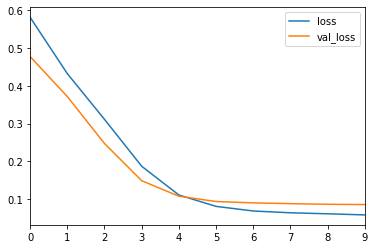

In [28]:
metrics_table_4[33][['loss', 'val_loss']].plot()

### (iii) 5 layers:

In [29]:
metrics_table_5 = []
result_5 = []

In [30]:
neuron = [10, 30, 50]
act_fun = ['relu', 'tanh', 'sigmoid']
opt = ['adam', 'SGD', 'RMSprop']
epoch = [10, 20, 30] 

for units in neuron:
    for activation in act_fun:
        for optimizer in opt:
            for epochs in epoch:
                
                ann = Sequential()
                ann.add(Dense(units = units, activation = activation)) #hidden layer 1
                ann.add(Dense(units = units, activation = activation)) #hidden layer 2
                ann.add(Dense(units = units, activation = activation)) #hidden layer 3
                ann.add(Dense(units = units, activation = activation)) #hidden layer 4
                ann.add(Dense(units = units, activation = activation)) #hidden layer 5
                ann.add(Dense(units = 1, activation = 'sigmoid'))

                ann.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

                early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

                ann.fit(x_train, y_train, epochs = epochs, validation_data = (x_test, y_test), callbacks = [early_stop])
                
                metrics_general = pd.DataFrame(ann.history.history)
                metrics_table_5.append(metrics_general)

                y_pred = ann.predict(x_test)
                y_pred = (y_pred > 0.5)
                #print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis = 1))

                #Confusion matrix and accuracy score:
                cm = confusion_matrix(y_test, y_pred)
                ac = accuracy_score(y_test, y_pred)
                
                #Precision:
                ps = precision_score(y_test, y_pred, average = 'macro')
                
                #AUC metric: (also the ROC curve)
                roc_auc_metric = roc_auc_score(y_test, y_pred)

                dic = dict({'neurons':units, 'activation_function':activation, 'optimizer':optimizer, 'epochs':epochs, 'confusion_matrix':cm, 'accuracy':ac, 'precision':ps, 'ROC_AUC_curve':roc_auc_metric})
                result_5.append(dic)

Epoch 1/10
16/16 [==============================] - 0s 24ms/step - loss: 0.6472 - accuracy: 0.4199 - val_loss: 0.6094 - val_accuracy: 0.6140
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5941 - accuracy: 0.7695 - val_loss: 0.5579 - val_accuracy: 0.8713
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.5474 - accuracy: 0.8984 - val_loss: 0.5123 - val_accuracy: 0.9123
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5071 - accuracy: 0.9238 - val_loss: 0.4785 - val_accuracy: 0.9298
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.9512 - val_loss: 0.4537 - val_accuracy: 0.9474
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4511 - accuracy: 0.9531 - val_loss: 0.4353 - val_accuracy: 0.9474
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4304 - accuracy: 0.9551 - val_loss: 0.4193 - val_accuracy: 0.9474
Epoch 8/10
16/16 [=

16/16 [==============================] - 0s 4ms/step - loss: 0.0670 - accuracy: 0.9766 - val_loss: 0.0943 - val_accuracy: 0.9708
Epoch 1/10
16/16 [==============================] - 0s 17ms/step - loss: 0.6774 - accuracy: 0.4688 - val_loss: 0.6691 - val_accuracy: 0.8421
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.8887 - val_loss: 0.6564 - val_accuracy: 0.9181
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6487 - accuracy: 0.9082 - val_loss: 0.6438 - val_accuracy: 0.9123
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.9199 - val_loss: 0.6304 - val_accuracy: 0.9064
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.9199 - val_loss: 0.6155 - val_accuracy: 0.9123
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.9277 - val_loss: 0.5986 - val_accuracy: 0.9298
Epoch 7/10
16/16 [============

16/16 [==============================] - 0s 3ms/step - loss: 0.2372 - accuracy: 0.9590 - val_loss: 0.2654 - val_accuracy: 0.9357
Epoch 29/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.9590 - val_loss: 0.2607 - val_accuracy: 0.9357
Epoch 30/30
16/16 [==============================] - 0s 4ms/step - loss: 0.2276 - accuracy: 0.9590 - val_loss: 0.2561 - val_accuracy: 0.9357
Epoch 1/10
16/16 [==============================] - 0s 14ms/step - loss: 0.6083 - accuracy: 0.8164 - val_loss: 0.5513 - val_accuracy: 0.7778
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.8574 - val_loss: 0.4347 - val_accuracy: 0.9006
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.3686 - accuracy: 0.9062 - val_loss: 0.3420 - val_accuracy: 0.9298
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.2872 - accuracy: 0.9512 - val_loss: 0.2812 - val_accuracy: 0.9357
Epoch 5/10
16/16 [==========

16/16 [==============================] - 0s 4ms/step - loss: 0.0658 - accuracy: 0.9785 - val_loss: 0.1099 - val_accuracy: 0.9532
Epoch 27/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0655 - accuracy: 0.9785 - val_loss: 0.1090 - val_accuracy: 0.9532
Epoch 28/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0644 - accuracy: 0.9805 - val_loss: 0.1090 - val_accuracy: 0.9532
Epoch 29/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0645 - accuracy: 0.9785 - val_loss: 0.1082 - val_accuracy: 0.9532
Epoch 30/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0633 - accuracy: 0.9824 - val_loss: 0.1073 - val_accuracy: 0.9532
Epoch 1/10
16/16 [==============================] - 0s 13ms/step - loss: 0.4802 - accuracy: 0.9277 - val_loss: 0.4119 - val_accuracy: 0.9357
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.9609 - val_loss: 0.3041 - val_accuracy: 0.9591
Epoch 3/10
16/16 [========

16/16 [==============================] - 0s 3ms/step - loss: 0.0792 - accuracy: 0.9805 - val_loss: 0.1126 - val_accuracy: 0.9649
Epoch 25/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0780 - accuracy: 0.9805 - val_loss: 0.1103 - val_accuracy: 0.9649
Epoch 26/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0771 - accuracy: 0.9805 - val_loss: 0.1098 - val_accuracy: 0.9649
Epoch 27/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 0.9805 - val_loss: 0.1083 - val_accuracy: 0.9649
Epoch 28/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0755 - accuracy: 0.9824 - val_loss: 0.1073 - val_accuracy: 0.9649
Epoch 29/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0749 - accuracy: 0.9824 - val_loss: 0.1066 - val_accuracy: 0.9649
Epoch 30/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0746 - accuracy: 0.9824 - val_loss: 0.1053 - val_accuracy: 0.9649
Epoch 1/10
16/16 [=======

16/16 [==============================] - 0s 3ms/step - loss: 0.1068 - accuracy: 0.9766 - val_loss: 0.1893 - val_accuracy: 0.9357
Epoch 23/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1052 - accuracy: 0.9766 - val_loss: 0.1881 - val_accuracy: 0.9357
Epoch 24/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1038 - accuracy: 0.9766 - val_loss: 0.1871 - val_accuracy: 0.9415
Epoch 25/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.9766 - val_loss: 0.1861 - val_accuracy: 0.9415
Epoch 26/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1014 - accuracy: 0.9766 - val_loss: 0.1852 - val_accuracy: 0.9415
Epoch 27/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1003 - accuracy: 0.9766 - val_loss: 0.1843 - val_accuracy: 0.9415
Epoch 28/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0994 - accuracy: 0.9766 - val_loss: 0.1835 - val_accuracy: 0.9415
Epoch 29/30
16/16 [======

16/16 [==============================] - 0s 14ms/step - loss: 1.2711 - accuracy: 0.3418 - val_loss: 1.1685 - val_accuracy: 0.3743
Epoch 2/10
16/16 [==============================] - 0s 6ms/step - loss: 1.1772 - accuracy: 0.3418 - val_loss: 1.0862 - val_accuracy: 0.3743
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 1.0943 - accuracy: 0.3418 - val_loss: 1.0119 - val_accuracy: 0.3743
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 1.0174 - accuracy: 0.3418 - val_loss: 0.9483 - val_accuracy: 0.3743
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.9526 - accuracy: 0.3418 - val_loss: 0.8906 - val_accuracy: 0.3743
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.8926 - accuracy: 0.3418 - val_loss: 0.8429 - val_accuracy: 0.3743
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.8424 - accuracy: 0.3418 - val_loss: 0.8018 - val_accuracy: 0.3743
Epoch 8/10
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6437 - accuracy: 0.6582 - val_loss: 0.6651 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.6582 - val_loss: 0.6646 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.6582 - val_loss: 0.6645 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.6582 - val_loss: 0.6630 - val_accuracy: 0.6257
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6423 - accuracy: 0.6582 - val_loss: 0.6634 - val_accuracy: 0.6257
Epoch 1/30


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 13ms/step - loss: 0.6600 - accuracy: 0.6582 - val_loss: 0.6650 - val_accuracy: 0.6257
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6582 - val_loss: 0.6613 - val_accuracy: 0.6257
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.6582 - val_loss: 0.6605 - val_accuracy: 0.6257
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6430 - accuracy: 0.6582 - val_loss: 0.6606 - val_accuracy: 0.6257
Epoch 1/10

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



16/16 [==============================] - 0s 13ms/step - loss: 0.6771 - accuracy: 0.6582 - val_loss: 0.6764 - val_accuracy: 0.6257
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.6582 - val_loss: 0.6707 - val_accuracy: 0.6257
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.6582 - val_loss: 0.6670 - val_accuracy: 0.6257
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6555 - accuracy: 0.6582 - val_loss: 0.6646 - val_accuracy: 0.6257
Epoch 5/10
16/16 [==============================] - 0s 6ms/step - loss: 0.6521 - accuracy: 0.6582 - val_loss: 0.6631 - val_accuracy: 0.6257
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6495 - accuracy: 0.6582 - val_loss: 0.6621 - val_accuracy: 0.6257
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6475 - accuracy: 0.6582 - val_loss: 0.6616 - val_accuracy: 0.6257
Epoch 8/10
16/16 [===========

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6683 - accuracy: 0.6582 - val_loss: 0.6713 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.6582 - val_loss: 0.6674 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6560 - accuracy: 0.6582 - val_loss: 0.6648 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.6582 - val_loss: 0.6632 - val_accuracy: 0.6257
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6582 - val_loss: 0.6622 - val_accuracy: 0.6257
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6477 - accuracy: 0.6582 - val_loss: 0.6616 - val_accuracy: 0.6257
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.6582 - val_loss: 0.6614 - val_accuracy: 0.6257
Epoch 8/20
16/16 [=

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



16/16 [==============================] - 0s 14ms/step - loss: 0.6440 - accuracy: 0.6582 - val_loss: 0.6615 - val_accuracy: 0.6257
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6434 - accuracy: 0.6582 - val_loss: 0.6617 - val_accuracy: 0.6257
Epoch 1/10


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 27ms/step - loss: 0.7574 - accuracy: 0.3418 - val_loss: 0.7256 - val_accuracy: 0.3743
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.7180 - accuracy: 0.3418 - val_loss: 0.7010 - val_accuracy: 0.3743
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5176 - val_loss: 0.6834 - val_accuracy: 0.6257
Epoch 4/10
16/16 [==============================] - 0s 6ms/step - loss: 0.6734 - accuracy: 0.6582 - val_loss: 0.6719 - val_accuracy: 0.6257
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.6582 - val_loss: 0.6650 - val_accuracy: 0.6257
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.6582 - val_loss: 0.6613 - val_accuracy: 0.6257
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.6582 - val_loss: 0.6604 - val_accuracy: 0.6257
Epoch 8/10
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 14ms/step - loss: 0.7786 - accuracy: 0.3418 - val_loss: 0.7333 - val_accuracy: 0.3743
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.7191 - accuracy: 0.3418 - val_loss: 0.6961 - val_accuracy: 0.3743
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5840 - val_loss: 0.6764 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.6582 - val_loss: 0.6648 - val_accuracy: 0.6257
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.6582 - val_loss: 0.6596 - val_accuracy: 0.6257
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.6582 - val_loss: 0.6577 - val_accuracy: 0.6257
Epoch 7/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6394 - accuracy: 0.6582 - val_loss: 0.6569 - val_accuracy: 0.6257
Epoch 8/20
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 13ms/step - loss: 0.6599 - accuracy: 0.6582 - val_loss: 0.6632 - val_accuracy: 0.6257
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.6582 - val_loss: 0.6612 - val_accuracy: 0.6257
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.6582 - val_loss: 0.6612 - val_accuracy: 0.6257
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.6582 - val_loss: 0.6616 - val_accuracy: 0.6257
Epoch 1/10


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 12ms/step - loss: 0.6262 - accuracy: 0.7637 - val_loss: 0.5289 - val_accuracy: 0.9474
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.9648 - val_loss: 0.3120 - val_accuracy: 0.9591
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9727 - val_loss: 0.1542 - val_accuracy: 0.9357
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.9688 - val_loss: 0.1325 - val_accuracy: 0.9415
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9746 - val_loss: 0.1193 - val_accuracy: 0.9474
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9746 - val_loss: 0.1089 - val_accuracy: 0.9532
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9766 - val_loss: 0.1070 - val_accuracy: 0.9532
Epoch 8/10
16/16 [============

16/16 [==============================] - 0s 4ms/step - loss: 0.3311 - accuracy: 0.9258 - val_loss: 0.3303 - val_accuracy: 0.9415
Epoch 14/20
16/16 [==============================] - 0s 3ms/step - loss: 0.2930 - accuracy: 0.9492 - val_loss: 0.2941 - val_accuracy: 0.9415
Epoch 15/20
16/16 [==============================] - 0s 4ms/step - loss: 0.2580 - accuracy: 0.9531 - val_loss: 0.2613 - val_accuracy: 0.9415
Epoch 16/20
16/16 [==============================] - 0s 4ms/step - loss: 0.2269 - accuracy: 0.9629 - val_loss: 0.2322 - val_accuracy: 0.9415
Epoch 17/20
16/16 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 0.9648 - val_loss: 0.2063 - val_accuracy: 0.9415
Epoch 18/20
16/16 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9707 - val_loss: 0.1838 - val_accuracy: 0.9415
Epoch 19/20
16/16 [==============================] - 0s 4ms/step - loss: 0.1551 - accuracy: 0.9766 - val_loss: 0.1650 - val_accuracy: 0.9415
Epoch 20/20
16/16 [======

16/16 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9785 - val_loss: 0.0829 - val_accuracy: 0.9649
Epoch 1/10
16/16 [==============================] - 0s 12ms/step - loss: 0.3009 - accuracy: 0.9512 - val_loss: 0.1716 - val_accuracy: 0.9474
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9785 - val_loss: 0.1497 - val_accuracy: 0.9474
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.9785 - val_loss: 0.1491 - val_accuracy: 0.9474
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9785 - val_loss: 0.1424 - val_accuracy: 0.9474
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0798 - accuracy: 0.9785 - val_loss: 0.1408 - val_accuracy: 0.9474
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0781 - accuracy: 0.9785 - val_loss: 0.1357 - val_accuracy: 0.9474
Epoch 7/10
16/16 [============

16/16 [==============================] - 0s 5ms/step - loss: 0.0973 - accuracy: 0.9727 - val_loss: 0.1728 - val_accuracy: 0.9298
Epoch 15/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0954 - accuracy: 0.9746 - val_loss: 0.1709 - val_accuracy: 0.9357
Epoch 16/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0939 - accuracy: 0.9766 - val_loss: 0.1691 - val_accuracy: 0.9357
Epoch 17/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0925 - accuracy: 0.9746 - val_loss: 0.1675 - val_accuracy: 0.9415
Epoch 18/20
16/16 [==============================] - 0s 6ms/step - loss: 0.0914 - accuracy: 0.9746 - val_loss: 0.1659 - val_accuracy: 0.9415
Epoch 19/20
16/16 [==============================] - 0s 6ms/step - loss: 0.0904 - accuracy: 0.9766 - val_loss: 0.1645 - val_accuracy: 0.9415
Epoch 20/20
16/16 [==============================] - 0s 6ms/step - loss: 0.0896 - accuracy: 0.9785 - val_loss: 0.1631 - val_accuracy: 0.9415
Epoch 1/30
16/16 [=======

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 13ms/step - loss: 0.7082 - accuracy: 0.4473 - val_loss: 0.6671 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.6582 - val_loss: 0.6627 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6415 - accuracy: 0.6582 - val_loss: 0.6644 - val_accuracy: 0.6257


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/30
16/16 [==============================] - 0s 18ms/step - loss: 0.6439 - accuracy: 0.6582 - val_loss: 0.6627 - val_accuracy: 0.6257
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.6582 - val_loss: 0.6623 - val_accuracy: 0.6257
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6409 - accuracy: 0.6582 - val_loss: 0.6607 - val_accuracy: 0.6257
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.6582 - val_loss: 0.6593 - val_accuracy: 0.6257
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.6582 - val_loss: 0.6517 - val_accuracy: 0.6257
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6250 - accuracy: 0.6582 - val_loss: 0.6372 - val_accuracy: 0.6257
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6031 - accuracy: 0.6582 - val_loss: 0.6076 - val_accuracy: 0.6257
Epoch 8/30
16/16 [=

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 14ms/step - loss: 1.0083 - accuracy: 0.3418 - val_loss: 0.8518 - val_accuracy: 0.3743
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.8043 - accuracy: 0.3418 - val_loss: 0.7340 - val_accuracy: 0.3743
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.7110 - accuracy: 0.4004 - val_loss: 0.6860 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.6582 - val_loss: 0.6690 - val_accuracy: 0.6257
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.6582 - val_loss: 0.6632 - val_accuracy: 0.6257
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6582 - val_loss: 0.6614 - val_accuracy: 0.6257
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6451 - accuracy: 0.6582 - val_loss: 0.6613 - val_accuracy: 0.6257
Epoch 8/20
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 13ms/step - loss: 0.6555 - accuracy: 0.6582 - val_loss: 0.6820 - val_accuracy: 0.6257
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6493 - accuracy: 0.6582 - val_loss: 0.6752 - val_accuracy: 0.6257
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6468 - accuracy: 0.6582 - val_loss: 0.6711 - val_accuracy: 0.6257
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6446 - accuracy: 0.6582 - val_loss: 0.6683 - val_accuracy: 0.6257
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6435 - accuracy: 0.6582 - val_loss: 0.6666 - val_accuracy: 0.6257
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.6582 - val_loss: 0.6658 - val_accuracy: 0.6257
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.6582 - val_loss: 0.6650 - val_accuracy: 0.6257
Epoch 8/30
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



16/16 [==============================] - 0s 14ms/step - loss: 0.6964 - accuracy: 0.5371 - val_loss: 0.6640 - val_accuracy: 0.6257
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.6582 - val_loss: 0.6617 - val_accuracy: 0.6257
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.6582 - val_loss: 0.6592 - val_accuracy: 0.6257
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.6582 - val_loss: 0.6599 - val_accuracy: 0.6257
Epoch 1/20


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 13ms/step - loss: 0.6464 - accuracy: 0.6582 - val_loss: 0.6643 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6416 - accuracy: 0.6582 - val_loss: 0.6617 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.6582 - val_loss: 0.6584 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.6582 - val_loss: 0.6530 - val_accuracy: 0.6257
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6289 - accuracy: 0.6582 - val_loss: 0.6436 - val_accuracy: 0.6257
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.6582 - val_loss: 0.6241 - val_accuracy: 0.6257
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 0.5873 - accuracy: 0.6582 - val_loss: 0.5874 - val_accuracy: 0.6257
Epoch 8/20
16/16 [============

16/16 [==============================] - 0s 5ms/step - loss: 0.0697 - accuracy: 0.9785 - val_loss: 0.0931 - val_accuracy: 0.9415
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0649 - accuracy: 0.9805 - val_loss: 0.0937 - val_accuracy: 0.9474
Epoch 1/10
16/16 [==============================] - 0s 15ms/step - loss: 0.6407 - accuracy: 0.7109 - val_loss: 0.6167 - val_accuracy: 0.9357
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5874 - accuracy: 0.9590 - val_loss: 0.5689 - val_accuracy: 0.9357
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.9648 - val_loss: 0.5223 - val_accuracy: 0.9474
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4867 - accuracy: 0.9668 - val_loss: 0.4736 - val_accuracy: 0.9415
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4344 - accuracy: 0.9688 - val_loss: 0.4225 - val_accuracy: 0.9474
Epoch 6/10
16/16 [============

16/16 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9766 - val_loss: 0.1336 - val_accuracy: 0.9474
Epoch 28/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0776 - accuracy: 0.9766 - val_loss: 0.1333 - val_accuracy: 0.9474
Epoch 29/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0771 - accuracy: 0.9766 - val_loss: 0.1329 - val_accuracy: 0.9474
Epoch 30/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 0.9766 - val_loss: 0.1326 - val_accuracy: 0.9474
Epoch 1/10
16/16 [==============================] - 0s 15ms/step - loss: 0.3432 - accuracy: 0.9434 - val_loss: 0.1360 - val_accuracy: 0.9532
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9746 - val_loss: 0.1029 - val_accuracy: 0.9532
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9766 - val_loss: 0.0942 - val_accuracy: 0.9532
Epoch 4/10
16/16 [=========

16/16 [==============================] - 0s 4ms/step - loss: 0.0840 - accuracy: 0.9785 - val_loss: 0.1292 - val_accuracy: 0.9474
Epoch 12/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0825 - accuracy: 0.9785 - val_loss: 0.1287 - val_accuracy: 0.9474
Epoch 13/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0814 - accuracy: 0.9785 - val_loss: 0.1284 - val_accuracy: 0.9474
Epoch 14/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0805 - accuracy: 0.9785 - val_loss: 0.1281 - val_accuracy: 0.9474
Epoch 15/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0797 - accuracy: 0.9785 - val_loss: 0.1279 - val_accuracy: 0.9474
Epoch 16/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0791 - accuracy: 0.9785 - val_loss: 0.1278 - val_accuracy: 0.9474
Epoch 17/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0785 - accuracy: 0.9785 - val_loss: 0.1277 - val_accuracy: 0.9474
Epoch 18/20
16/16 [======

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6663 - accuracy: 0.6113 - val_loss: 0.6716 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6436 - accuracy: 0.6582 - val_loss: 0.6616 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.6582 - val_loss: 0.6596 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6436 - accuracy: 0.6582 - val_loss: 0.6614 - val_accuracy: 0.6257


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/30
16/16 [==============================] - 0s 19ms/step - loss: 0.6872 - accuracy: 0.5488 - val_loss: 0.6668 - val_accuracy: 0.6257
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6493 - accuracy: 0.6582 - val_loss: 0.6714 - val_accuracy: 0.6257


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/10
16/16 [==============================] - 0s 12ms/step - loss: 0.6550 - accuracy: 0.6582 - val_loss: 0.6619 - val_accuracy: 0.6257
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6582 - val_loss: 0.6617 - val_accuracy: 0.6257
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6582 - val_loss: 0.6623 - val_accuracy: 0.6257
Epoch 1/20


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 12ms/step - loss: 0.6757 - accuracy: 0.6309 - val_loss: 0.6678 - val_accuracy: 0.6257
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.6582 - val_loss: 0.6617 - val_accuracy: 0.6257
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.6582 - val_loss: 0.6613 - val_accuracy: 0.6257
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6434 - accuracy: 0.6582 - val_loss: 0.6622 - val_accuracy: 0.6257
Epoch 1/30


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 12ms/step - loss: 0.9294 - accuracy: 0.3418 - val_loss: 0.7636 - val_accuracy: 0.3743
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7195 - accuracy: 0.4238 - val_loss: 0.6806 - val_accuracy: 0.6257
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.6582 - val_loss: 0.6635 - val_accuracy: 0.6257
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.6582 - val_loss: 0.6610 - val_accuracy: 0.6257
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6441 - accuracy: 0.6582 - val_loss: 0.6616 - val_accuracy: 0.6257
Epoch 1/10


c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


16/16 [==============================] - 0s 12ms/step - loss: 0.6533 - accuracy: 0.6309 - val_loss: 0.6665 - val_accuracy: 0.6257
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6434 - accuracy: 0.6582 - val_loss: 0.6621 - val_accuracy: 0.6257
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.6582 - val_loss: 0.6615 - val_accuracy: 0.6257
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.6582 - val_loss: 0.6486 - val_accuracy: 0.6257
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.6582 - val_loss: 0.5928 - val_accuracy: 0.6257
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.6602 - val_loss: 0.4977 - val_accuracy: 0.6433
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8848 - val_loss: 0.3625 - val_accuracy: 0.9181
Epoch 8/10
16/16 [============

c:\users\nasa\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
max_acu = 0 #maximum accuracy score
for i in range(0, len(result_5)):
    if result_5[i]['accuracy'] > max_acu:
        max_acu = result_5[i]['accuracy']
        index_max_acu = i
    else:
        continue

In [32]:
print(max_acu)
print(index_max_acu)

0.9707602339181286
2


In [34]:
result_5[2]

{'neurons': 10,
 'activation_function': 'relu',
 'optimizer': 'adam',
 'epochs': 30,
 'confusion_matrix': array([[104,   3],
        [  2,  62]], dtype=int64),
 'accuracy': 0.9707602339181286,
 'precision': 0.967489114658926,
 'ROC_AUC_curve': 0.9703563084112149}

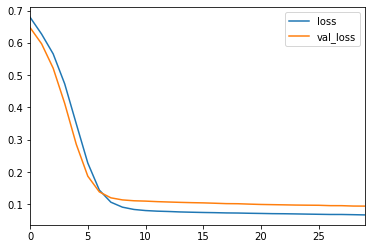

In [35]:
metrics_table_5[2][['loss', 'val_loss']].plot()